<a href="https://colab.research.google.com/github/abhishekv5055/ArrayDemo/blob/master/Home_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠Home Loan Prediction
This notebook contains the eligibility of the customer to get a home loan from the company called `Dreaming Loan Housing Finance`. This company wants to automate this procedure of selecting the customer that are eligible for getting the home loan.

**This is a Analytics Vidhya Hackathons problem. The score is based on the Evaluation Metrics i.e. Accuracy.**

For this particular problem we perform:
* Defining problem statement
* Understand the Dataset
* Evaluate the Dataset
* Perform Feature Engineering 
* Define the machine learning model
* Perform the Experiments

So, first we understand the problem by defining the problem statement provided in the competition.


## Problem Statement
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

## Understand the Dataset
While moving forward to design the machine learning model or make our data ready for train the machine learning model, first we understand the keywords used in the dataset for defining the lables and the features.


### Data Dictionary
* Loan_ID -	Unique Loan ID
* Gender -	Male/ Female
* Married -	Applicant married (Y/N)
* Dependents -	Number of dependents
* Education -	Applicant Education (Graduate/ Under Graduate)
* Self_Employed -	Self employed (Y/N)
* ApplicantIncome -	Applicant income
* CoapplicantIncome -	Coapplicant income
* LoanAmount -	Loan amount in thousands
* Loan_Amount_Term -	Term of loan in months
* Credit_History -	credit history meets guidelines
* Property_Area -	Urban/ Semi Urban/ Rural
* Loan_Status -	(Target) Loan approved (Y/N)

Now lets perform some evaluation to find the relation between the labels and feature. So, move forward and perform the `Exploratory Data Analysis or (EDA)`.

## Evaluation over the Dataset

In [1]:
# import all the required evaluation libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:

# Load the training dataset
train_df = pd.read_csv("/content/drive/MyDrive/Home Loan Prediction/home-loan-train.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:

train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Lets create a list of all the column that have an empty rows
empty_list = [name for name in train_df.columns if train_df[name].isna().sum() != 0]

In [7]:
empty_list

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

So, first lets create a bar graph for the gender column and find how many amle and feamle candidate apply for the home loan

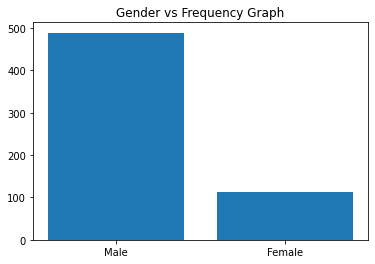

In [8]:
plt.bar(train_df['Gender'].unique()[:2], train_df['Gender'].value_counts());
plt.title("Gender vs Frequency Graph");

As expected, male gender are more applicant that apply for the home loan. Do you know the reason behind this fact?

Lets create a function for ploting the graph between the different labels that help us to make the prediction more easily.

In [9]:
def ploty(x_data=None, y_data=None, title=None, x_label = None, y_label=None):
  """
  This is used to plot the bar graph between the x_data and the y_data
  """
  # define the bar graph
  plt.bar(x_data, y_data)
  # define the title
  plt.title(title)
  # define the x-label
  plt.xlabel(x_label)
  # define the y-label
  plt.ylabel(y_label)
  

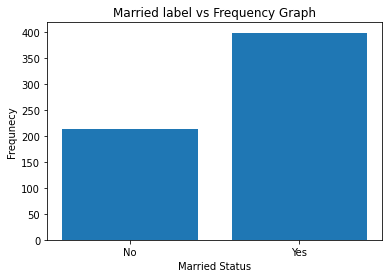

In [10]:

# Lets plot the graph between the married applicant with their frequency
ploty(x_data = train_df["Married"].unique()[:2], 
      y_data = np.sort(train_df['Married'].value_counts()),
      title="Married label vs Frequency Graph",
      x_label = "Married Status",
      y_label = "Frequnecy")

Most of the customer that apply for the home loan are the one that were married. They can be the one who loss their job or it can be,they have more number of dependents members in the family. What do you think about this prediction from the graph?

Now, lets plot the graph between the dependent label, Married label and the gender labels and predict the relation between these three labels using the bar graph.

**Here Dependents label describe the number of dependent family members they have that are totaly depend on their income.**

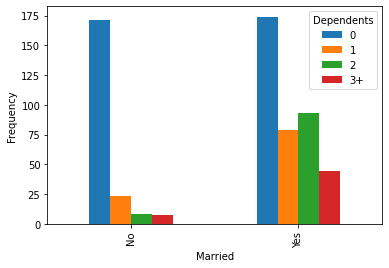

In [11]:

married_dependent_df = pd.crosstab(train_df['Married'], train_df['Dependents'])
married_dependent_df.plot.bar()
plt.ylabel('Frequency');

In all the four categories of dependents, Married one are applying for the home loan as they have more number of depedent family members and also the person that dont have any dependent memebers and are married their number is maximum in the graph. What do you think, weather they are applying for the home loans because of the dependent member in the family or thier could be any other reason?

Lets make the prediction using the `Education` Label and findout what is eduction qualification of the applicant that are applying for the home loan.

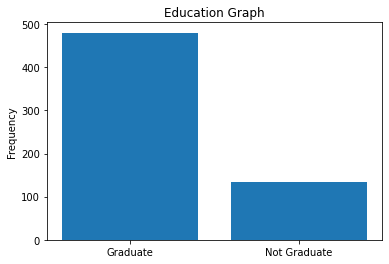

In [12]:
ploty(y_data = train_df['Education'].value_counts(),
      x_data = train_df['Education'].unique(),
      title='Education Graph',
      y_label='Frequency')

Mostly `Graduate` customer apply for the home loan. `Not Graduate` customer can be the person who doing the small business or they shift from one place to another. In terms of education qualification, what can be the reason that most of the educated person are applying for getting the home loan?

Our next observation can be answer to the above problem that we are getting while making the prediction for the education qualification. Lets see the person that were self-employed and graduated are applying for the home loan or the other possible combination.

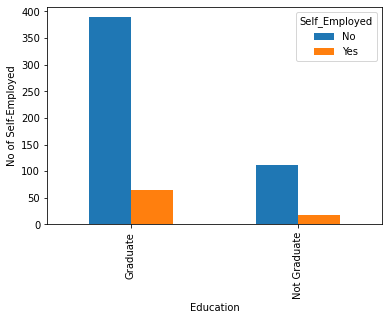

In [13]:
pd.crosstab(train_df['Education'], train_df['Self_Employed']).plot.bar()
plt.ylabel("No of Self-Employed");

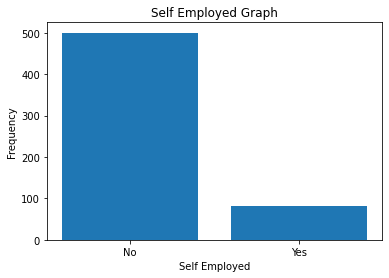

In [14]:
ploty(x_data=train_df['Self_Employed'].unique()[:2],
      y_data=train_df['Self_Employed'].value_counts(),
      x_label='Self Employed',
      y_label='Frequency',
      title='Self Employed Graph')

So, mostly the graduated customer that were not self-employed were applying for the home loan. And also from the `Self_Employed` graph we can see that mostly customer that were not self-employed apply for the application.

Lets create a function for the numeric data to plot the `line graph` to understand the data and make prediction.

In [15]:
def line_ploty(x_data, y_data, title=None, x_label=None, y_label=None):
  """
  Plot the line graph between the x_data and the y_data for the numerical data
  """
  plt.figure(figsize=(40, 10))
  # define the line graph
  plt.plot(x_data, y_data)
  # define the title
  plt.title(title)
  # define the x-label
  plt.xlabel(x_label)
  # define the y-label
  plt.ylabel(y_label)

Lets plot the graph for the `ApplicantIncome` label and check what is the income of the customer that are applying for the application.

In [16]:
def make_data_defination(data):
  """
  This function converts the ApplicantIncome label into different section.
  """
  if data in range(150, 1000):
    return "150-1000"
  if data in range(1000, 25000):
    return "1000-25000"
  if data in range(25000, 50000):
    return "25000-50000"
  if data in range(50000, 85000):
    return ">85000"

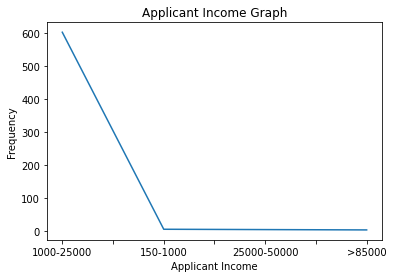

In [17]:
train_df['ApplicantIncome'].apply(make_data_defination).value_counts().plot(kind='line');
plt.title('Applicant Income Graph')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency');

So, most the customer have the Income from the range between the 1000 to 25000. This can also be the reason for applying for the home loan. What do you think, this is because of the low income or some other factor that influence the customer for applying application?

Lets plot the graph for the coapplicant income btw **Coapplicant in terms of home loan is the additional person that is involve in the approval of the loan. It increase the chances of accepting the application of the customer.**

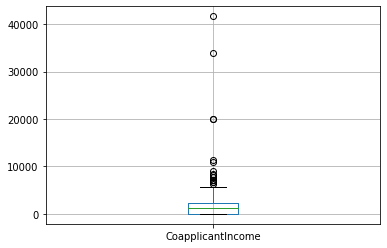

In [18]:
train_df.boxplot(column=['CoapplicantIncome']);

So, as we see that most of the value of `CoapplicantIncome` label is treated as outliers means they are the value that are not equal or close to the median of the label or we can say that they lay outside the value where most of the dataset value lie.

Lets find out the median of the `CoapplicantIncome` label and compare it with the other value in the dataset.

In [19]:
train_df['CoapplicantIncome'].median()

1188.5

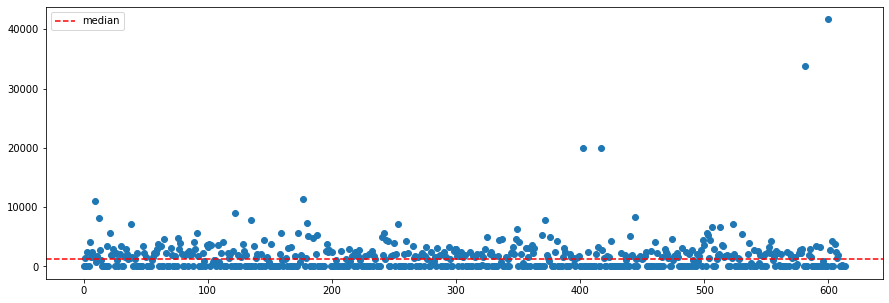

In [20]:
plt.figure(figsize=(15, 5));
x=np.arange(0, 614)
plt.scatter(x, train_df['CoapplicantIncome'])
plt.axhline(train_df['CoapplicantIncome'].median(), label='median', linestyle='--', color='red');
plt.legend();

As we see now most of the value in the CoapplicantIncome label is treated as outliers because of the above specified reason.

Lets check how much amount customer have applied for the loan and check weather there is any kind of limit or they can apply any amount they want. In this we compare the limit with the:
* Gender label
* Education qualification label
* Self-Employed label
* Customer that attach the CoapplicantIncome

**Loan Amount is in thousand.**


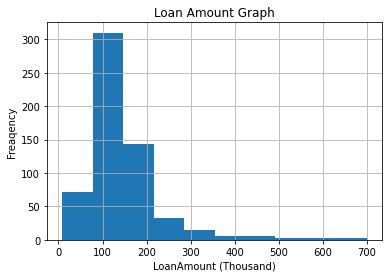

In [21]:
plt.hist(train_df['LoanAmount']);
plt.grid();
plt.xlabel('LoanAmount (Thousand)')
plt.ylabel('Freaqency')
plt.title('Loan Amount Graph');

We see that most of the customer had apply for the loan of amount between the 100 to 150 thousand. This could be the limit or it should be the average home rate at the particular country if this company is not work for any customer outside the country.

Lets compare the Loan Amount with the other labels in the dataset.

In [22]:
def loan_amount(data, label1, label2):
  """
  This function create a report for the realtion between the loan amount and the gender
  """
  amount1 = 0 # initialize for the amount1
  amount2 = 0 # initialize for the amount2
  # remove all the 'nan' value from the LoanAmount column
  new_amount = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
  for i in range(0, len(train_df)):
    # total the amount1
    if data[i] == label1:
      amount1 = amount1 + new_amount[i]
    # total the amount2
    elif data[i] == label2:
      amount2 = amount2 + new_amount[i]
  # count the number of label in the dataset
  real_label1, real_label2 = data.value_counts()
  # find the average
  amount1 = amount1/real_label1
  amount2 = amount2/real_label2
  # return the amount
  return amount1, amount2

In [23]:
male, female = loan_amount(data=train_df['Gender'], 
                           label1='Male', 
                           label2='Female'
                          )
loan_amount_gender = {"Male": male,
                      "Female": female
}

In [24]:
graduate, non_graduate = loan_amount(data=train_df['Education'], 
                                     label1='Graduate', 
                                     label2='Not Graduate'
                                    )
loan_education = {"Graduate": graduate,
                  "Not Graduate": non_graduate
}

In [25]:
self_employed_yes, self_employed_no = loan_amount(data=train_df['Self_Employed'],
                                                  label1='No',
                                                  label2='Yes')
loan_employed = {"No": self_employed_yes,
                 "Yes": self_employed_no
                 }

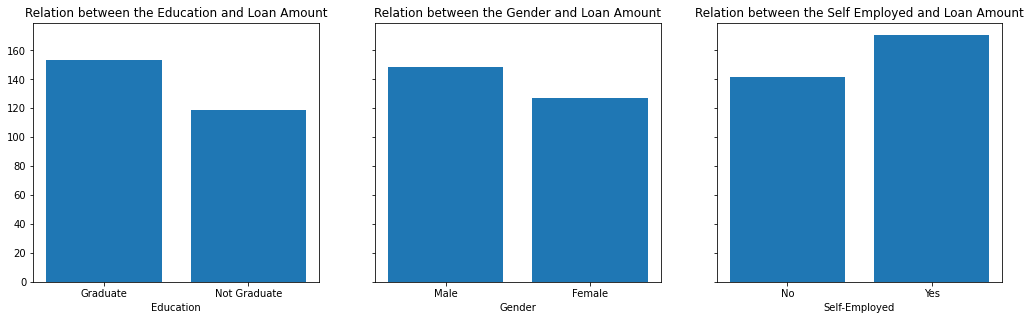

In [26]:
# define the subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.tight_layout(pad=4.0)
# bar chart for education and loan amount
ax1.bar(loan_education.keys(), loan_education.values())
ax1.set_xlabel('Education')
ax1.set_title('Relation between the Education and Loan Amount')
# bar chart for gender and loan amount
ax2.bar(loan_amount_gender.keys(), loan_amount_gender.values())
ax2.set_xlabel('Gender')
ax2.set_title('Relation between the Gender and Loan Amount')
# bar chart for self employed and loan amount
ax3.bar(loan_employed.keys(), loan_employed.values())
ax3.set_xlabel('Self-Employed')
ax3.set_title('Relation between the Self Employed and Loan Amount');

So, lots of EDA we had perform and understand our dataset and the relation between the different labels. Lets plot the correlation matrix for positive and negative relation between the numerical datasets.

**Positive relation means if one label increase than other label also increasing.
Negative Relation defines that if one label increase than other label in decreasing.**


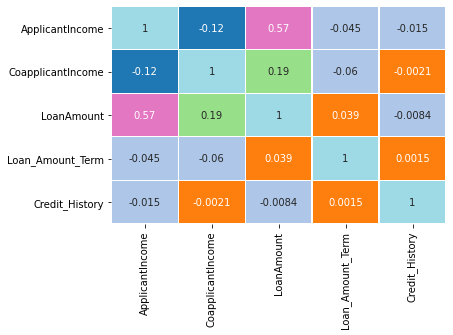

In [27]:
sns.heatmap(train_df.corr(), annot=True, cbar=False, linewidth=0.2, cmap='tab20');

## 4. Perform Feature Engineering
In this section, we perform the feature engineering to make our dataset ready for training the model. We fill all the missing dataset and convert the all the data into numerical format.

In [28]:
train_df_copy = train_df.copy()

In [29]:
train_df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
train_df_copy.isna().shape

(614, 13)

In [31]:
train_df_copy.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
def num_convert(data, label1, label2, label3=None):
  for i in range(0, len(data)):
    if data[i] == label1:
      data[i] = 1
    elif data[i] == label2:
      data[i] = 2
    elif data[i] == label3:
      data[i] = 3
  return data

In [33]:
train_df_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
def fill_value(data):
  data = data.fillna(data.median())
  return data

In [35]:
train_df_copy['Gender'] = fill_value(num_convert(train_df_copy['Gender'], 'Male', 'Female'))
train_df_copy['Married'] = fill_value(num_convert(train_df_copy['Married'], 'Yes', 'No'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
train_df_copy['Education'] = num_convert(train_df_copy['Education'], 'Graduate', 'Not Graduate')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
train_df_copy['Self_Employed'] = fill_value(num_convert(train_df_copy['Self_Employed'], 'Yes', 'No'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [38]:
train_df_copy['Property_Area'] = num_convert(train_df_copy['Property_Area'], 'Urban', 'Rural', 'Semiurban')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:

train_df_copy['LoanAmount'] = fill_value(train_df_copy['LoanAmount'])

In [40]:
train_df_copy['Loan_Amount_Term'] = fill_value(train_df_copy['Loan_Amount_Term'])

In [41]:
train_df_copy['Credit_History'] = fill_value(train_df_copy['Credit_History'])

In [42]:
train_df_copy.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
train_df_copy['Dependents'] = fill_value(num_convert(train_df_copy['Dependents'], '1', '2', '3+'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
for i in range(0, len(train_df_copy['Loan_ID'])):
  train_df_copy['Loan_ID'][i] = i
train_df_copy.to_csv('update_train.csv', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
test_df = pd.read_csv('/content/drive/MyDrive/Home Loan Prediction/home-loan-test.csv')
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [58]:
for i in range(0, len(test_df['Loan_ID'])):
  test_df['Loan_ID'][i] = i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
test_df['Gender'] = fill_value(num_convert(test_df['Gender'], 'Male', 'Female'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
test_df['Dependents'] = fill_value(num_convert(test_df['Dependents'], '1', '2', '3+'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
test_df['Self_Employed'] = fill_value(num_convert(test_df['Self_Employed'], 'Yes', 'No'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [62]:
test_df['LoanAmount'] = fill_value(test_df['LoanAmount'])

In [63]:
test_df['Loan_Amount_Term'] = fill_value(test_df['Loan_Amount_Term'])

In [64]:

test_df['Credit_History'] = fill_value(test_df['Credit_History'])

In [65]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1.0,Yes,0,Graduate,2.0,5720,0,110.0,360.0,1.0,Urban
1,1,1.0,Yes,1,Graduate,2.0,3076,1500,126.0,360.0,1.0,Urban
2,2,1.0,Yes,2,Graduate,2.0,5000,1800,208.0,360.0,1.0,Urban
3,3,1.0,Yes,2,Graduate,2.0,2340,2546,100.0,360.0,1.0,Urban
4,4,1.0,No,0,Not Graduate,2.0,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1.0,Yes,3,Not Graduate,1.0,4009,1777,113.0,360.0,1.0,Urban
363,363,1.0,Yes,0,Graduate,2.0,4158,709,115.0,360.0,1.0,Urban
364,364,1.0,No,0,Graduate,2.0,3250,1993,126.0,360.0,1.0,Semiurban
365,365,1.0,Yes,0,Graduate,2.0,5000,2393,158.0,360.0,1.0,Rural


In [66]:
test_df['Married'] = num_convert(test_df['Married'], 'Yes', 'No')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
test_df['Education'] = num_convert(test_df['Education'], 'Graduate', 'Not Graduate')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
test_df['Property_Area'] = num_convert(test_df['Property_Area'], 'Urban', 'Rural', 'Semiurban')
test_df.to_csv('update_test.csv', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We perform our feature engineering successfully. We convert all our data into numerical and fill all the missing values.
Lets train our model. We use two classifier machine learning model:
* RandomForestClassifier
* XGBoost

## Train the Model
In this section, we train the classifier machine learning model. First we train the RandomForestClassifier then XGBoost.

In [69]:
train = pd.read_csv('/content/drive/MyDrive/Home Loan Prediction/update_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Home Loan Prediction/update_test.csv')

In [70]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,2.0,0.0,1,2.0,5849,0.0,128.0,360.0,1.0,1,Y
1,1,1.0,1.0,1.0,1,2.0,4583,1508.0,128.0,360.0,1.0,2,N
2,2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,Y
3,3,1.0,1.0,0.0,2,2.0,2583,2358.0,120.0,360.0,1.0,1,Y
4,4,1.0,2.0,0.0,1,2.0,6000,0.0,141.0,360.0,1.0,1,Y


In [71]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1.0,1,0.0,1,2.0,5720,0,110.0,360.0,1.0,1
1,1,1.0,1,1.0,1,2.0,3076,1500,126.0,360.0,1.0,1
2,2,1.0,1,2.0,1,2.0,5000,1800,208.0,360.0,1.0,1
3,3,1.0,1,2.0,1,2.0,2340,2546,100.0,360.0,1.0,1
4,4,1.0,2,0.0,2,2.0,3276,0,78.0,360.0,1.0,1


In [72]:
train_X, train_y = train.drop('Loan_Status', axis=1), train['Loan_Status']

In [73]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier

In [74]:
model_rf = RandomForestClassifier(n_estimators=1000)
model_xg = XGBClassifier(n_estimators=40)
model_xgbrf = XGBRFClassifier(n_estimators=40)
model_kne = KNeighborsClassifier(n_neighbors=614)

In [75]:
model_rf.fit(train_X, train_y)
model_xg.fit(train_X, train_y)
model_xgbrf.fit(train_X, train_y)
model_kne.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=614, p=2,
                     weights='uniform')

In [76]:

y_preds_rf = model_rf.predict(test)
y_preds_xg = model_xg.predict(test)
y_preds_xgbrf = model_xgbrf.predict(test)
y_preds_kne = model_kne.predict(test)

In [77]:
def convert_csv(preds, filename):
  sub_file = pd.DataFrame(preds, columns=['Loan_Status'], index=test_df['Loan_ID'])
  sub_file.to_csv(filename)

In [92]:
convert_csv(y_preds_grid_rf, 'submission_grid_rf.csv')
convert_csv(y_preds_grid_xg, 'submission_grid_xg.csv')
convert_csv(y_preds_xgbrf, 'submission_xgbrf.csv')
convert_csv(y_preds_kne, 'submission_kne.csv')

## Experiments
In this section, we perform the experiments to increase our model accuracy by performing hyperparameter tuning.
We use two types of hyperparameter tuning stategies:
* RandomForestCV
* GridSearchCV

In [79]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

random_grid_rf = {"n_estimators": [800, 1000],
                  "max_depth": [100],
                  "min_samples_leaf": [20],
                  "min_samples_split": [8],
                  "random_state": [20, 18]
}

In [80]:
random_model_rf = RandomizedSearchCV(RandomForestClassifier(),
                                  param_distributions=random_grid_rf,
                                  verbose=True,
                                  n_iter=10,
                                  n_jobs=-1,
                                  scoring='accuracy',
                                  cv=20)
random_model_rf.fit(train_X, train_y)

Fitting 20 folds for each of 4 candidates, totalling 80 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.3min finished


RandomizedSearchCV(cv=20, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [81]:
random_model_rf.best_params_

{'max_depth': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 8,
 'n_estimators': 800,
 'random_state': 20}

In [82]:
y_preds_random_rf = random_model_rf.predict(test)

In [83]:
grid_model_rf = GridSearchCV(RandomForestClassifier(),
                             param_grid=random_grid_rf,
                             verbose=True,
                             n_jobs=-1,
                             cv=10)
grid_model_rf.fit(train_X, train_y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   39.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [84]:
grid_model_rf.best_params_

{'max_depth': 100,
 'min_samples_leaf': 20,
 'min_samples_split': 8,
 'n_estimators': 800,
 'random_state': 20}

In [85]:
y_preds_grid_rf = grid_model_rf.predict(test)

In [86]:
random_grid_xg = {"reg_lambda": [1e-5, 1e-2, 0.1, 1, 100],
                  "eta": np.arange(0.02, 0.2, 0.01),
}

In [87]:
random_grid = RandomizedSearchCV(XGBClassifier(), 
                                 param_distributions=random_grid_xg,
                                 n_iter=20,
                                 scoring='accuracy',
                                 cv=50,
                                 random_state=42,
                                 n_jobs=-1)
random_grid.fit(train_X, train_y)

RandomizedSearchCV(cv=50, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [88]:
y_preds_random_xg = random_grid.predict(test)

In [89]:
random_grid.best_params_

{'eta': 0.09, 'reg_lambda': 100}

In [90]:
grid_xg = GridSearchCV(XGBClassifier(),
                       param_grid=random_grid_xg,
                       cv=10,
                       n_jobs=-1,
                       scoring='accuracy')
grid_xg.fit(train_X, train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
       0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]),
                      

In [91]:
y_preds_grid_xg = grid_xg.predict(test)